In [2]:
import pandas as pd
import matplotlib.pyplot as plt

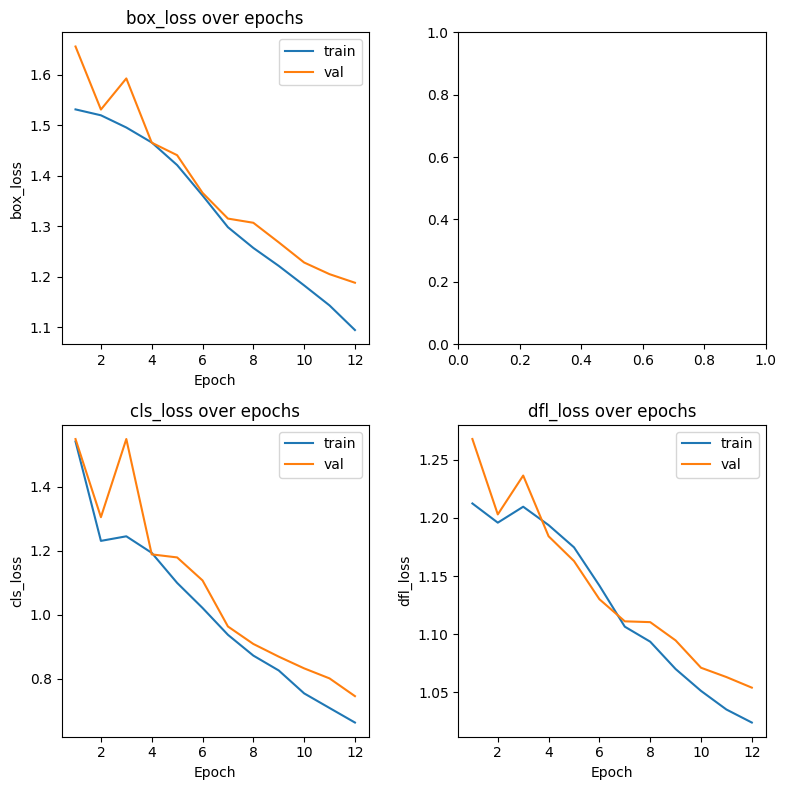

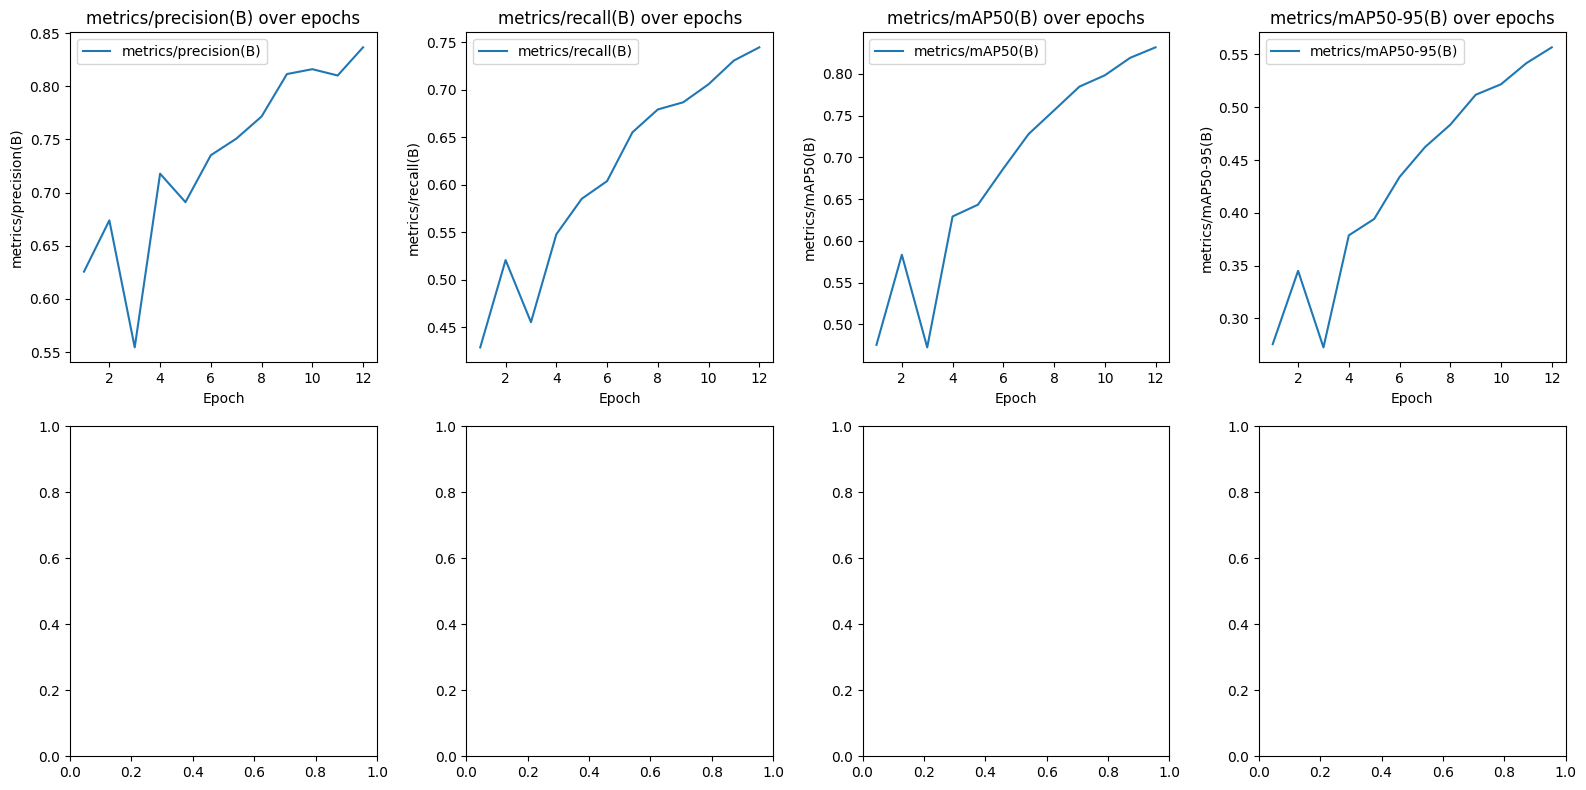

In [3]:
# Load the CSV file
file_path = '/home/work/road_mark/ai_hub_learning/pothole_detection_result/train/results.csv'
df = pd.read_csv(file_path)

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Define loss metrics to plot
loss_metrics = ['box_loss', 'seg_loss', 'cls_loss', 'dfl_loss']

# Plot loss metrics for train and val
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for idx, metric in enumerate(loss_metrics):
    row, col = divmod(idx, 2)
    train_col = f'train/{metric}'
    val_col = f'val/{metric}'
    if train_col in df.columns or val_col in df.columns:
        if train_col in df.columns:
            axes[row, col].plot(df['epoch'], df[train_col], label='train')
        if val_col in df.columns:
            axes[row, col].plot(df['epoch'], df[val_col], label='val')
        axes[row, col].set_title(f'{metric} over epochs')
        axes[row, col].set_xlabel('Epoch')
        axes[row, col].set_ylabel(f'{metric}')
        axes[row, col].legend()

plt.tight_layout()
plt.show()

# Define performance metrics to plot separately
performance_metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 
                       'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']

# Plot performance metrics
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, metric in enumerate(performance_metrics):
    row, col = divmod(idx, 4)
    if metric in df.columns:
        axes[row, col].plot(df['epoch'], df[metric], label=metric)
        axes[row, col].set_title(f'{metric} over epochs')
        axes[row, col].set_xlabel('Epoch')
        axes[row, col].set_ylabel(f'{metric}')
        axes[row, col].legend()

plt.tight_layout()
plt.show()

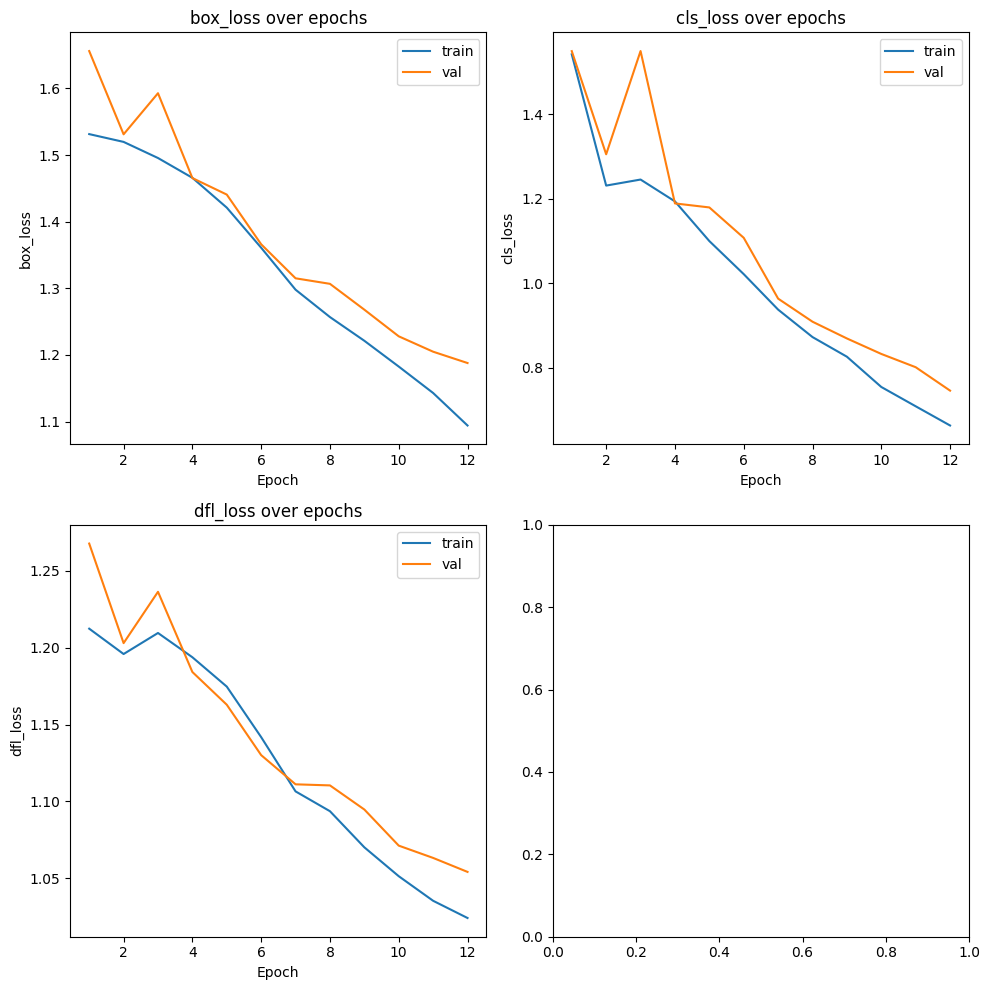

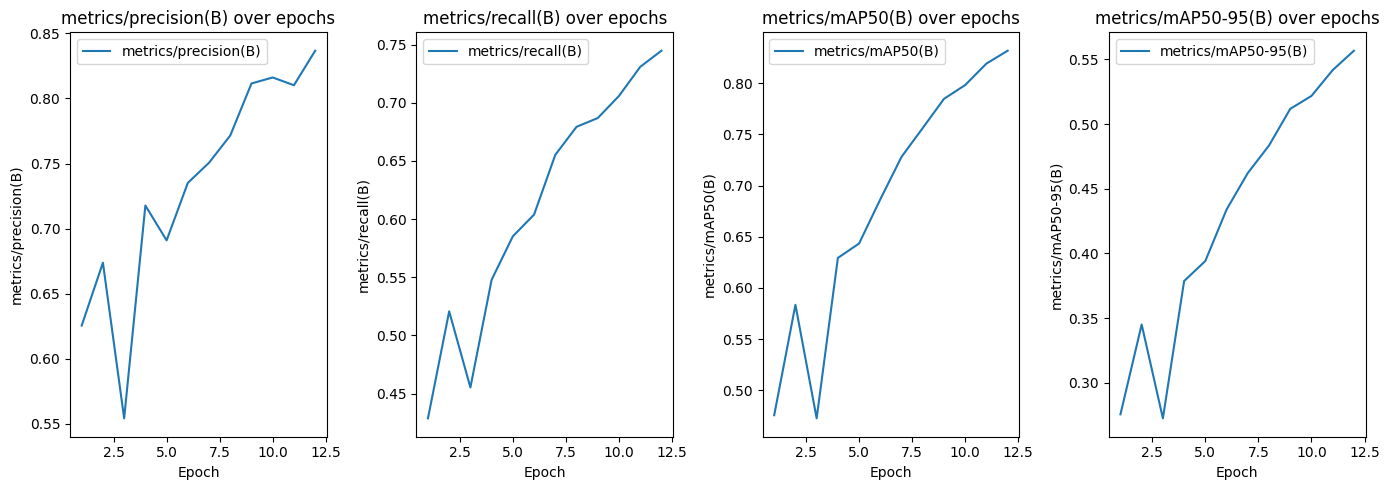

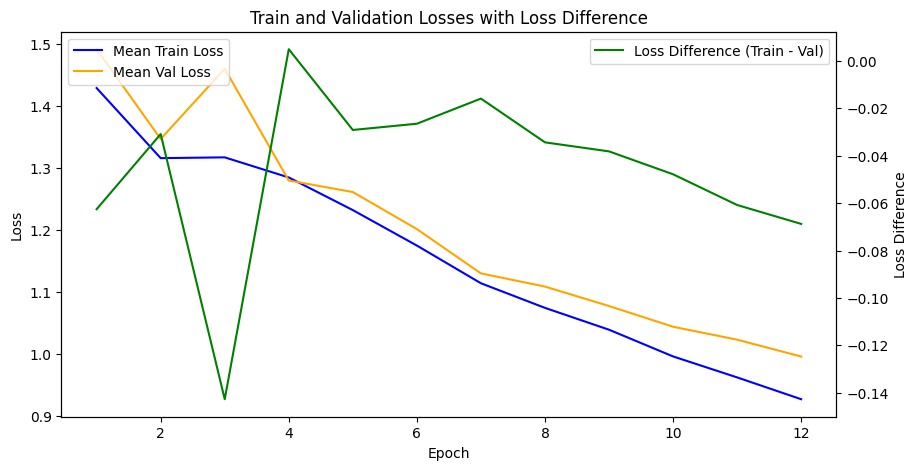

(11, 3)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the new CSV file
file_path = '/home/work/road_mark/ai_hub_learning/pothole_detection_result/train/results.csv'
df = pd.read_csv(file_path)

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Replace 'inf' values with NaN and interpolate to fill NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.interpolate(inplace=True)

# Define loss metrics to plot
loss_metrics = ['box_loss', 'cls_loss', 'dfl_loss']

# Plot loss metrics for train and val
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for idx, metric in enumerate(loss_metrics):
    row, col = divmod(idx, 2)
    train_col = f'train/{metric}'
    val_col = f'val/{metric}'
    if train_col in df.columns or val_col in df.columns:
        if train_col in df.columns:
            axes[row, col].plot(df['epoch'], df[train_col], label='train')
        if val_col in df.columns:
            axes[row, col].plot(df['epoch'], df[val_col], label='val')
        axes[row, col].set_title(f'{metric} over epochs')
        axes[row, col].set_xlabel('Epoch')
        axes[row, col].set_ylabel(f'{metric}')
        axes[row, col].legend()

plt.tight_layout()
plt.show()

# Define performance metrics to plot separately
performance_metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

# Plot performance metrics
fig, axes = plt.subplots(1, 4, figsize=(14, 5))

for idx, metric in enumerate(performance_metrics):
    if metric in df.columns:
        axes[idx].plot(df['epoch'], df[metric], label=metric)
        axes[idx].set_title(f'{metric} over epochs')
        axes[idx].set_xlabel('Epoch')
        axes[idx].set_ylabel(f'{metric}')
        axes[idx].legend()

plt.tight_layout()
plt.show()

# Analyze the results for overfitting and appropriate epoch value
train_losses = df[[f'train/{metric}' for metric in loss_metrics]]
val_losses = df[[f'val/{metric}' for metric in loss_metrics]]

# Determine the epoch at which validation loss stops improving significantly
min_val_loss_epoch = val_losses.mean(axis=1).idxmin()

# Calculate the difference between train and val losses to identify overfitting
loss_diff = train_losses.mean(axis=1) - val_losses.mean(axis=1)

# Plot the mean train and val losses along with their difference
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df['epoch'], train_losses.mean(axis=1), label='Mean Train Loss', color='blue')
ax1.plot(df['epoch'], val_losses.mean(axis=1), label='Mean Val Loss', color='orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df['epoch'], loss_diff, label='Loss Difference (Train - Val)', color='green')
ax2.set_ylabel('Loss Difference')
ax2.legend(loc='upper right')

plt.title('Train and Validation Losses with Loss Difference')
plt.show()

min_val_loss_epoch, loss_diff.idxmax()
